# pandas

The `pandas` module provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features from Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL.

Prerequisites: `NumPy`

## Table of Contents
* [Series](#Series)
 - [Creating a Series](#Creating-a-Series)
 - [Selecting and filtering in Series](#Selecting-and-filtering-in-Series)
 - [Operations on Series](#Operations-on-Series)
 - [Plotting a Series](#Plotting-a-Series)
* [DataFrame](#DataFrame)
 - [Creating a DataFrame](#Creating-a-DataFrame)
 - [Selecting and filtering in DataFrame](#Selecting-and-filtering-in-DataFrame)
 - [Transposing](#Transposing)
 - [Adding and removing columns](#Adding-and-removing-columns)
 - [Assigning new columns](#Assigning-new-columns)
 - [Evaluating an expression](#Evaluating-an-expression)
 - [Querying a DataFrame](#Querying-a-DataFrame)
 - [Sorting a DataFrame](#Sorting-a-DataFrame)
 - [Operations on DataFrame](#Operations-on-DataFrame)
 - [Automatic alignment for DataFrames](#Automatic-alignment-for-DataFrames)
 - [Plotting a DataFrame](#Plotting-a-DataFrame)
 - [Handling missing data](#Handling-missing-data)
 - [Aggregating with groupby](#Aggregating-with-groupby)
 - [Pivot tables](#Pivot-tables)
 - [Overview functions](#Overview-functions)
* [Combining DataFrames](#Combining-DataFrames)
 - [SQL like joins](#SQL-like-joins)
 - [Concatenation](#Concatenation)
* [Categories](#Categories)
* [Saving and loading](#Saving-and-loading)
 - [Saving](#Saving)
 - [Loading](#Loading)
* [Exercises](#Exercises)
 - [Possible solutions](#Possible-solutions)

In [1]:
# first set this so that jupyter notebook prints all output from a cell, 
# not just the most recent one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# let's also suppress warnings, as they can get annoying sometimes
import warnings
warnings.filterwarnings("ignore")

Let's import `pandas` with the usual convention as `pd`.

In [2]:
import pandas as pd

## Series

A `Series` is a one-dimensional array-like object containing a sequence of values and an associated array of data labels, called its *index*.

### Creating a Series
The simplest `Series` is formed from only an array of data.

In [3]:
obj = pd.Series([2,-1,3,5])
obj

0    2
1   -1
2    3
3    5
dtype: int64

The string representation of a `Series` displayed interactively shows the index on the
left and the values on the right.
You can get the array representation and index object of the `Series` via
its values and index attributes, respectively.

In [4]:
obj.values

array([ 2, -1,  3,  5])

In [5]:
obj.index # Like range(4)

RangeIndex(start=0, stop=4, step=1)

In [6]:
list(obj.index) # if you want the index as a list of values

[0, 1, 2, 3]

We may want to create a `Series` with an index identifying each data point with a label.

In [7]:
obj2 = pd.Series([2,-1,3,5], index=['a', 'b', 'c', 'd'])
obj2

a    2
b   -1
c    3
d    5
dtype: int64

In [8]:
list(obj2.index)

['a', 'b', 'c', 'd']

A `Series` can have a `name`.

In [9]:
obj_withName = pd.Series([83, 68], index=["bob", "alice"], name="weights")
obj_withName

bob      83
alice    68
Name: weights, dtype: int64

You can also create a `Series` object from a `dict`. The keys will be used as index labels.

In [10]:
weightdata = {"john": 86, "michael": 68, "alice": 68, "bob": 83}
obj3 = pd.Series(weightdata)
obj3

john       86
michael    68
alice      68
bob        83
dtype: int64

### Selecting and filtering in Series

Compared with `NumPy` arrays, you can use labels in the index when selecting single values or a set of values.

In [11]:
obj2

a    2
b   -1
c    3
d    5
dtype: int64

In [12]:
obj2['a']

2

In [13]:
obj2[['b','c','d']] 
# Here ['b', 'c', 'd'] is interpreted as a list of indices, even though it contains strings instead of integers.

b   -1
c    3
d    5
dtype: int64

You can still access the items by integer location, like in a regular array. By default, the rank of the item in the `Series` starts at **0**. 

In [14]:
obj2[0]

2

In [15]:
obj2[[1,3]]

b   -1
d    5
dtype: int64

In [16]:
obj2[obj2 < 0]

b   -1
dtype: int64

Slicing with labels behaves differently than normal Python slicing in that the endpoint is inclusive.

In [17]:
obj2['b':'c']

b   -1
c    3
dtype: int64

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location.

In [18]:
obj2.loc["a"]

2

In [19]:
obj2.iloc[0]

2

Slicing a `Series` also slices the index labels.

In [20]:
obj2.iloc[1:3]

b   -1
c    3
dtype: int64

This can lead to unexpected results when using the default numeric labels, so be careful:

In [21]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [22]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Oh look! The first element has index label **2**. The element with index label 0 is absent from the slice.

But remember that you can access elements by integer location using the iloc attribute. This illustrates another reason why it's always better to use loc and iloc to access Series objects.

In [23]:
surprise_slice.iloc[0]

1002

### Operations on Series
`Series` objects behave much like one-dimensional `ndarray`s, and you can often pass them as parameters to `NumPy` functions.

In [24]:
import numpy as np
np.exp(obj2)

a      7.389056
b      0.367879
c     20.085537
d    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s.

In [25]:
obj2 + [1000,2000,3000,4000]

a    1002
b    1999
c    3003
d    4005
dtype: int64

Similar to `NumPy`, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is called *broadcasting*.

In [26]:
obj2 + 1000

a    1002
b     999
c    1003
d    1005
dtype: int64

The same is true for all binary operations and even conditional operations.

### Plotting a Series
`pandas` makes it easy to plot `Series` data using `matplotlib`. Just import `matplotlib` and call the `plot()` method:

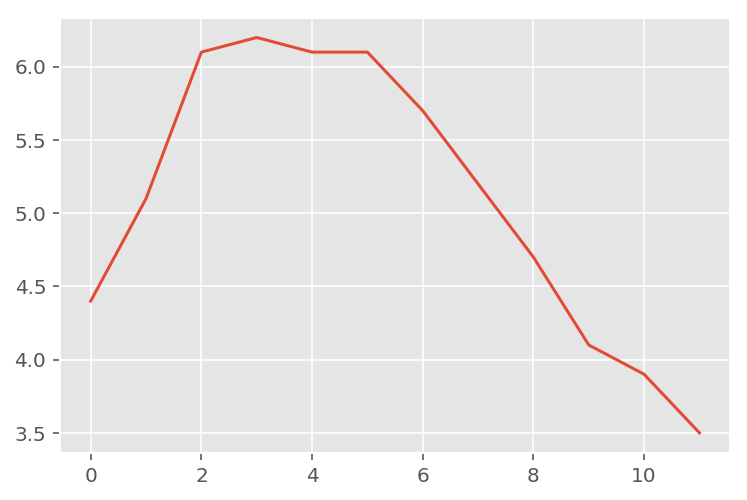

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
###
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show();

## DataFrame

A `DataFrame` represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). You can see `DataFrame`s as `dict` of `Series`.

### Creating a DataFrame
There are many ways to construct a `DataFrame`, though one of the most common is from a `dict` of equal-length lists or `NumPy` arrays.

In [28]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


For large `DataFrame`s, the `head` method selects only the first five rows.

In [29]:
df.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


You can also create a `DataFrame` by passing a `dict` of `Series` objects.

In [30]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


A few things to note:
* The `Series` were automatically aligned based on their index.
* Missing values are represented as `NaN`.
* `Series` names are ignored (the name `"year"` was dropped).

If you pass a list of columns and/or index row labels to the `DataFrame` constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist.

In [31]:
df2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
df2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, or a list of lists, and specify the column names and row index labels separately:

In [32]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
df3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
df3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


You can access columns pretty much as you would expect. They are returned as `Series` objects.

In [33]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

You can also get multiple columns at once.

In [34]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


To specify missing values, you can either use `np.nan` or `NumPy`'s masked arrays:

In [35]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
df3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
df3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [36]:
df4 = pd.DataFrame(
         df3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
df4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


### Selecting and filtering in DataFrame
Let's go back to the `people`:

In [37]:
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


The `loc` attribute lets you access rows instead of columns. The result is a `Series` object in which the `DataFrame`'s column names are mapped to row index labels.

In [38]:
people.loc["charles"]

weight        112
birthyear    1992
children        0
hobby         NaN
Name: charles, dtype: object

You can also access rows by integer location using the `iloc` attribute.

In [39]:
people.iloc[2]

weight        112
birthyear    1992
children        0
hobby         NaN
Name: charles, dtype: object

You can also get a slice of rows, and this returns a `DataFrame` object.

In [40]:
people.iloc[1:3]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


Finally, you can pass a boolean array to get the matching rows.

In [41]:
people[np.array([True, False, True])]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
charles,112,1992,0.0,NaN


This is most useful when combined with boolean expressions.

In [42]:
people[people["birthyear"] < 1990]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing


### Transposing
You can swap columns and indices using the `T` attribute.

In [43]:
people.T

,alice,bob,charles
weight,68,83,112
birthyear,1985,1984,1992
children,NaN,3,0
hobby,Biking,Dancing,NaN


### Adding and removing columns
You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following work fine.

In [44]:
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [45]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,weight,hobby,age,over 30
alice,68,Biking,33,True
bob,83,Dancing,34,True
charles,112,NaN,26,False


In [46]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

When you add a new colum, it must have the same number of rows. Missing rows are filled with NaN, and extra rows are ignored.

In [47]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

,weight,hobby,age,over 30,pets
alice,68,Biking,33,True,NaN
bob,83,Dancing,34,True,0.0
charles,112,NaN,26,False,5.0


When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert()` method.

In [48]:
people.insert(1, "height", [172, 181, 185])
people

,weight,height,hobby,age,over 30,pets
alice,68,172,Biking,33,True,NaN
bob,83,181,Dancing,34,True,0.0
charles,112,185,NaN,26,False,5.0


### Assigning new columns
You can also create new columns by calling the `assign()` method. Note that this returns a new `DataFrame` object, the original is not modified.

In [49]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,weight,height,hobby,age,over 30,pets,body_mass_index,has_pets
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,False
charles,112,185,NaN,26,False,5.0,32.724617,True


Note that you cannot access columns created within the same assignment.

In [50]:
try:
    people.assign(
        body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
        overweight = people["body_mass_index"] > 25
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


The solution is to split this assignment in two consecutive assignments.

In [51]:
df5 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
df5.assign(overweight = df5["body_mass_index"] > 25)

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,True
charles,112,185,NaN,26,False,5.0,32.724617,True


Having to create a temporary variable **df5** is not very convenient. You may want to just chain the assigment calls, but it does not work because the `people` object is not actually modified by the first assignment.

In [52]:
try:
    (people
         .assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
         .assign(overweight = people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)

Key error: 'body_mass_index'


But fear not, there is a simple solution. You can pass a function to the `assign()` method (typically a `lambda` function), and this function will be called with the `DataFrame` as a parameter.

In [53]:
(people
     .assign(body_mass_index = lambda df: df["weight"] / (df["height"] / 100) ** 2)
     .assign(overweight = lambda df: df["body_mass_index"] > 25)
)

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,True
charles,112,185,NaN,26,False,5.0,32.724617,True


Problem solved!

### Evaluating an expression
A great feature supported by `pandas` is expression evaluation. This relies on the `numexpr` library which must be installed.

In [54]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

Assignment expressions are also supported. Let's set `inplace=True` to directly modify the `DataFrame` rather than getting a modified copy:

In [55]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,weight,height,hobby,age,over 30,pets,body_mass_index
alice,68,172,Biking,33,True,NaN,22.985398
bob,83,181,Dancing,34,True,0.0,25.335002
charles,112,185,NaN,26,False,5.0,32.724617


You can use a local or global variable in an expression by prefixing it with `'@'`.

In [56]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,False
charles,112,185,NaN,26,False,5.0,32.724617,True


### Querying a DataFrame
The `query()` method lets you filter a `DataFrame` based on a query expression.

In [57]:
people.query("age > 30 and pets == 0")

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
bob,83,181,Dancing,34,True,0.0,25.335002,False


### Sorting a DataFrame
You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their index label, in ascending order, but let's reverse the order.

In [58]:
people.sort_index(ascending=False)

,weight,height,hobby,age,over 30,pets,body_mass_index,overweight
charles,112,185,NaN,26,False,5.0,32.724617,True
bob,83,181,Dancing,34,True,0.0,25.335002,False
alice,68,172,Biking,33,True,NaN,22.985398,False


Note that `sort_index` returned a sorted *copy* of the `DataFrame`. To modify `people` directly, we can set the `inplace` argument to `True`. Also, we can sort the columns instead of the rows by setting `axis=1`.

In [59]:
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83
charles,26,32.724617,185,NaN,False,True,5.0,112


To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by.

In [60]:
people.sort_values(by="age", inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,26,32.724617,185,NaN,False,True,5.0,112
alice,33,22.985398,172,Biking,True,False,NaN,68
bob,34,25.335002,181,Dancing,True,False,0.0,83


### Operations on DataFrame
Although `DataFrame`s do not try to mimick `NumPy` arrays, there are a few similarities. Let's create a `DataFrame` to demonstrate this:

In [61]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


You can apply `NumPy` mathematical functions on a `DataFrame`. The function is applied to all values.

In [62]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Similarly, adding a single value to a `DataFrame` will add that value to all elements in the `DataFrame`. This is called *broadcasting*.

In [63]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Of course, the same is true for all other binary operations, including arithmetic (`*`,`/`,`**`...) and conditional (`>`, `==`...) operations.

In [64]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Aggregation operations, such as computing the `max`, the `sum` or the `mean` of a `DataFrame`, apply to each column, and you get back a `Series` object.

In [65]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

The `all` method is also an aggregation operation: it checks whether all values are `True` or not. Let's see during which months all students got a grade greater than `5`.

In [66]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed vertically (on each column). You can set `axis=1` to execute the operation horizontally (on each row). For example, let's find out which students had all grades greater than `5`:

In [67]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

The `any` method returns `True` if any value is True. Let's see who got at least one grade 10:

In [68]:
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

If you add a `Series` object to a `DataFrame` (or execute any other binary operation), `pandas` attempts to broadcast the operation to all *rows* in the `DataFrame`. This only works if the `Series` has the same size as the `DataFrame`s rows. For example, let's substract the `mean` of the `DataFrame` (a `Series` object) from the `DataFrame`:

In [69]:
grades - grades.mean()  # equivalent to: grades - [7.75, 8.75, 7.50]

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


We substracted `7.75` from all September grades, `8.75` from October grades and `7.50` from November grades. It is equivalent to substracting this `DataFrame`.

In [70]:
pd.DataFrame([[7.75, 8.75, 7.50]]*4, index=grades.index, columns=grades.columns)

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
charles,7.75,8.75,7.5
darwin,7.75,8.75,7.5


If you want to substract the global mean from every grade, here is one way to do it:

In [71]:
grades - grades.values.mean() # substracts the global mean (8.00) from all grades

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


### Plotting a DataFrame
Just like for `Series`, `pandas` makes it easy to draw nice graphs based on a `DataFrame`.

For example, it is easy to create a bar plot from a `DataFrame`'s data by calling its `plot` method.

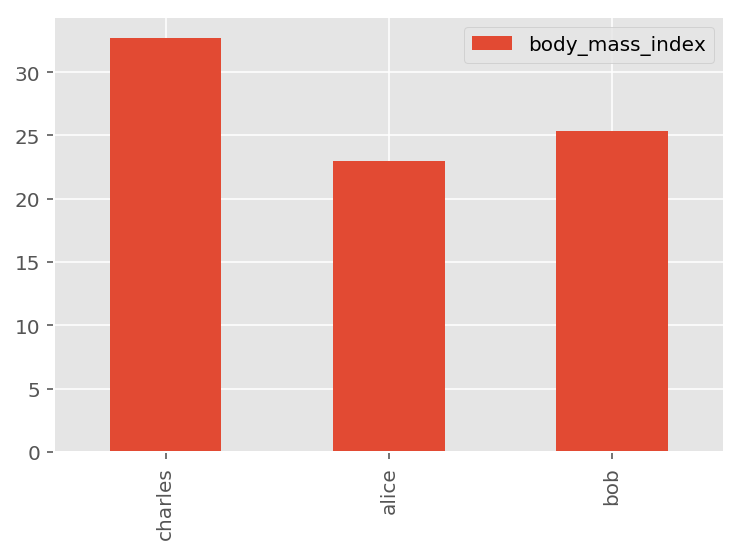

In [74]:
people.plot(kind = "bar", y = ["body_mass_index"])
plt.show();

You can pass extra arguments supported by matplotlib's functions. For example, we can create scatterplot and pass it a list of sizes using the `s` argument of matplotlib's `scatter()` function.

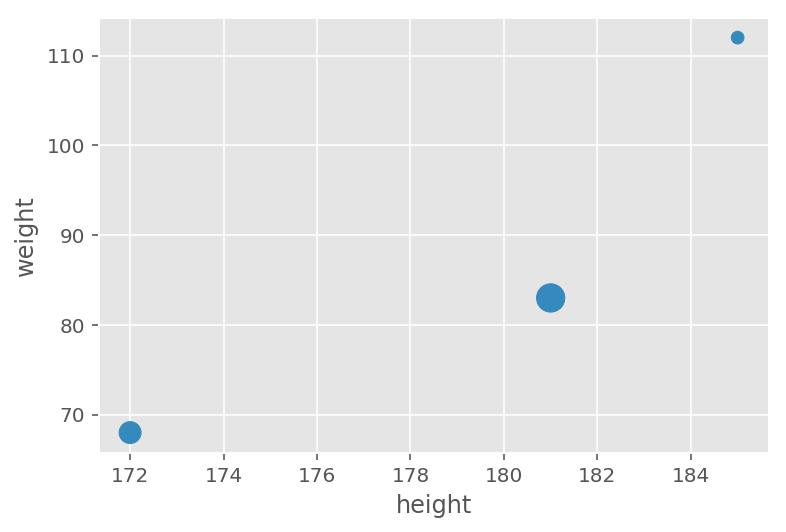

In [75]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
plt.show();

Again, there are way too many options to list here: the best option is to scroll through the [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) page in `pandas` documentation and find the plot you are interested in.

### Handling missing data
Dealing with missing data is a frequent task when working with real life data. `pandas` offers a few tools to handle missing data.

The `isnull` and `notnull` functions in `pandas` can be used to detect missing data.

In [76]:
pd.isnull(grades)

,sep,oct,nov
alice,False,False,False
bob,False,False,False
charles,False,False,False
darwin,False,False,False


In [77]:
pd.notnull(grades)

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,True,True,True
darwin,True,True,True


We may want that, for instance, missing data should result in a zero, instead of `NaN`. We can replace all `NaN` values by a any value using the `fillna()` method.

In [78]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
charles,0.0,5.0,11.0,0.0
colin,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


It's a bit unfair that we're setting grades to zero in September, though. Perhaps we should decide that missing grades are missing grades, but missing bonus points should be replaced by zeros.

In [79]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, "sep", 0)
fixed_bonus_points.loc["alice"] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


That's much better: although we made up some data, we have not been too unfair.

Another way to handle missing data is to interpolate. Let's look at the `bonus_points` `DataFrame` again:

In [80]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Now let's call the `interpolate` method. By default, it interpolates vertically (`axis=0`), so let's tell it to interpolate horizontally (`axis=1`).

In [81]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0.0,1.0,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


Bob had 0 bonus points in October, and 2 in December. When we interpolate for November, we get the mean: 1 bonus point. Colin had 1 bonus point in November, but we do not know how many bonus points he had in September, so we cannot interpolate, this is why there is still a missing value in October after interpolation. To fix this, we can set the September bonus points to 0 before interpolation.

In [82]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, "sep", 0)
better_bonus_points.loc["alice"] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
colin,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
charles,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


Great, now we have reasonable bonus points everywhere. Let's find out the final grades:

In [83]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
charles,NaN,5.0,11.0,4.0
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


It is slightly annoying that the September column ends up on the right. This is because the `DataFrame`s we are adding do not have the exact same columns (the `grades` `DataFrame` is missing the `"dec"` column), so to make things predictable, `pandas` orders the final columns alphabetically. To fix this, we can simply add the missing column before adding.

In [84]:
grades["dec"] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


There's not much we can do about December and Colin: it's bad enough that we are making up bonus points, but we can't reasonably make up grades (well I guess some teachers probably do). So let's call the `dropna()` method to get rid of rows that are full of `NaN`s:

In [85]:
final_grades_clean = final_grades.dropna(how="all")
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
charles,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


Now let's remove columns that are full of `NaN`s by setting the `axis` argument to `1`:

In [86]:
final_grades_clean = final_grades_clean.dropna(axis=1, how="all")
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
charles,4.0,11.0,5.0
darwin,9.0,10.0,11.0


### Overview functions
When dealing with large `DataFrames`, it is useful to get a quick overview of its content. `pandas` offers a few functions for this. First, let's create a large `DataFrame` with a mix of numeric values, missing values and text values. Notice how Jupyter displays only the corners of the `DataFrame`:

In [96]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df.head(10)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
5,55.0,66.0,99.0,Blabla,154.0,44.0,143.0,77.0,33.0,11.0,...,66.0,55.0,66.0,99.0,154.0,44.0,143.0,77.0,33.0,11.0
6,66.0,77.0,110.0,Blabla,165.0,55.0,154.0,88.0,44.0,22.0,...,77.0,66.0,77.0,110.0,165.0,55.0,154.0,88.0,44.0,22.0
7,77.0,88.0,121.0,Blabla,NaN,66.0,165.0,99.0,55.0,33.0,...,88.0,77.0,88.0,121.0,NaN,66.0,165.0,99.0,55.0,33.0
8,88.0,99.0,132.0,Blabla,NaN,77.0,NaN,110.0,66.0,44.0,...,99.0,88.0,99.0,132.0,NaN,77.0,NaN,110.0,66.0,44.0
9,99.0,110.0,143.0,Blabla,11.0,88.0,NaN,121.0,77.0,55.0,...,110.0,99.0,110.0,143.0,11.0,88.0,NaN,121.0,77.0,55.0


The `head()` method returns the top 5 rows.

In [97]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


Of course there's also a `tail()` function to view the bottom 5 rows. You can pass the number of rows you want.

In [98]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


The `info()` method prints out a summary of each columns contents.

In [99]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
A            8823 non-null float64
B            8824 non-null float64
C            8824 non-null float64
some_text    10000 non-null object
D            8824 non-null float64
E            8822 non-null float64
F            8824 non-null float64
G            8824 non-null float64
H            8822 non-null float64
I            8823 non-null float64
J            8823 non-null float64
K            8822 non-null float64
L            8824 non-null float64
M            8824 non-null float64
N            8822 non-null float64
O            8824 non-null float64
P            8824 non-null float64
Q            8824 non-null float64
R            8823 non-null float64
S            8824 non-null float64
T            8824 non-null float64
U            8824 non-null float64
V            8822 non-null float64
W            8824 non-null float64
X            8824 non-null float64
Y            8822

Finally, the `describe()` method gives a nice overview of the main aggregated values over each column:
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [100]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


## Combining DataFrames

### Concatenation
Rather than joining `DataFrame`s, we may just want to concatenate them using `concat()` method.

In [107]:
result_concat = pd.concat([city_loc, city_pop], sort = False)
result_concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


Note that this operation aligned the data horizontally (by columns) but not vertically (by rows). In this example, we end up with multiple rows having the same index (eg. 3). `pandas` handles this rather gracefully.

In [108]:
result_concat.loc[3]

,state,city,lat,lng,population
3,OH,Cleveland,41.473508,-81.739791,NaN
3,California,San Francisco,NaN,NaN,808976.0


Or you can tell `pandas` to just ignore the index.

In [109]:
pd.concat([city_loc, city_pop], ignore_index=True, sort = False)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


Notice that when a column does not exist in a `DataFrame`, it acts as if it was filled with `NaN` values. If we set `join="inner"`, then only columns that exist in *both* `DataFrame`s are returned.

In [110]:
pd.concat([city_loc, city_pop], join="inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


You can concatenate `DataFrame`s horizontally instead of vertically by setting `axis=1`.

In [111]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


In this case it really does not make much sense because the indices do not align well (eg. Cleveland and San Francisco end up on the same row, because they shared the index label `3`). So let's reindex the `DataFrame`s by city name before concatenating:

In [112]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1, sort = False)

,state,lat,lng,population,state
San Francisco,CA,37.781334,-122.416728,808976.0,California
New York,NY,40.705649,-74.008344,8363710.0,New-York
Miami,FL,25.791100,-80.320733,413201.0,Florida
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas


This looks a lot like a `FULL OUTER JOIN`, except that the `state` columns were not renamed to `state_x` and `state_y`, and the `city` column is now the index.

The `append()` method is a useful shorthand for concatenating `DataFrame`s vertically:

In [113]:
city_loc.append(city_pop, sort = False)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


## Categories

As always in `pandas`, the `append()` method does *not* actually modify `city_loc`: it works on a copy and returns the modified copy.

It is quite frequent to have values that represent categories, for example `1` for female and `2` for male, or `"A"` for Good, `"B"` for Average, `"C"` for Bad. These categorical values can be hard to read and cumbersome to handle, but fortunately `pandas` makes it easy. To illustrate this, let's take the `city_pop` `DataFrame` we created earlier, and add a column that represents a category:

In [114]:
city_econ = city_pop.copy()
city_econ["econ_code"] = [17, 17, 34, 20]
city_econ

,population,city,state,econ_code
3,808976,San Francisco,California,17
4,8363710,New York,New-York,17
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


Right now the `econ_code` column is full of apparently meaningless codes. Let's fix that. First, we will create a new categorical column based on the `econ_code`s:

In [115]:
city_econ["economy"] = city_econ["econ_code"].astype('category')
city_econ["economy"].cat.categories

Int64Index([17, 20, 34], dtype='int64')

Now we can give each category a meaningful name:

In [116]:
city_econ["economy"].cat.categories = ["Finance", "Energy", "Tourism"]
city_econ

,population,city,state,econ_code,economy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New-York,17,Finance
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy


Note that categorical values are sorted according to their categorical order, *not* their alphabetical order:

In [117]:
city_econ.sort_values(by="economy", ascending=False)

,population,city,state,econ_code,economy
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy
4,8363710,New York,New-York,17,Finance
3,808976,San Francisco,California,17,Finance


## Saving and loading

`pandas` can save `DataFrame`s to various backends, including file formats such as CSV, Excel, JSON, HTML and HDF5, or to a SQL database. Let's create a `DataFrame` to demonstrate this:

In [118]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


### Saving
Let's save it as a CSV file.

In [119]:
my_df.to_csv("my_df.csv")


### Loading
Now let's load our CSV file back into a `DataFrame`:

In [122]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


As you might guess, there are similar `read_json`, `read_html`, `read_excel` functions as well.  We can also read data straight from the Internet. For example, let's load all New York State Zip codes from [data.ny.gov](https://data.ny.gov):

In [123]:
ny_zip = None
try:
    csv_url = "https://data.ny.gov/api/views/juva-r6g2/rows.csv"
    ny_zip = pd.read_csv(csv_url, index_col=0)
    ny_zip = ny_zip.head()
except IOError as e:
    print(e)
ny_zip

,State FIPS,County Code,County FIPS,ZIP Code,File Date
County Name,,,,,
Albany,36,1,36001,12007,07/25/2007
Albany,36,1,36001,12009,07/25/2007
Albany,36,1,36001,12023,07/25/2007
Albany,36,1,36001,12041,07/25/2007
Albany,36,1,36001,12045,07/25/2007


There are more options available, in particular regarding datetime format. Check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) for more details.

## Exercises

1. Create a Series using the following number: `3.14`, `2.718`, `1.618` with the following labels "`pi`", "`euler's number`", "`golden ratio`". Then filter values that are only greater than 2.

2. Create the following DataFrame (But use `name` as the index):

| name | age | state | num_children | num_pets |
|----|---|----|---|----|
| john  | 23 | iowa | 2 | 0 |
| mary  | 78 | dc | 2 | 4 |
| peter  | 22 | california | 0 | 0 |
| jeff  | 19 | texas | 1 | 5 |
| bill  | 45 | washington | 2 | 0 |
| lisa  | 33 | dc | 1 | 0 |

Then, create a bar plot that shows `age` for each person in `name`.

3. Add another person as a new row to the previous DataFrame with the following values (**HINT**: use `pd.concat`):

name: `mike`, age: `0`, state: `new york`, num_children: `1`, num_pets: `0`.

Since this new person has a child, his age cannot be zero. Replace it with the median age of all other people in the DataFrame.

### Possible solutions

1. Indexing and selecting in Series

```python
s = pd.Series([3.14, 2.718, 1.618], index = ["pi", "euler's number", "golden ratio"])

s[s > 2]
```

2. Creating and plotting a DataFrame

```python
df1 = pd.DataFrame(data={'age':[23,78,22,19,45,33],'state':['iowa','dc','california','texas','washington','dc'],'num_children':[2,2,0,1,2,1],'num_pets':[0,4,0,5,0,0]},index=['john','mary','peter','jeff','bill','lisa'])

df1.plot(kind = "bar", y = "age")
```

3. Adding new row and handling missing data

```python
df2 = pd.DataFrame(data={'age':[0],'state':['new york'],'num_children':[1],'num_pets':[0]},index=['mike'])
df3 = pd.concat([df1,df2]) 
df2['age'] = df1['age'].median() # Calculate and add the median age of all other people to 'mike'
df3 = pd.concat([df1,df2]) # Update the DataFrame
```

## References

* [Machine Learning Notebooks](https://github.com/ageron/handson-ml2/blob/master/tools_pandas.ipynb)
* [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781491957653/)

***
MATH2319 - Machine Learning @ RMIT University